# Capstone Project: Malacious URL detection using Machine Learning and Artificial Intelligence


### Model Experiments

#### Explore some Machine Learning Algorithms

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"
import time
import warnings

from sklearn.utils.multiclass import unique_labels
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from pandas.plotting import scatter_matrix

from sklearn.metrics import accuracy_score


from colorama import Fore
from urllib.parse import urlparse
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score, precision_score, recall_score, roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.compose import make_column_transformer
from sklearn.metrics import precision_recall_fscore_support


from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Load Dataset

#### Read in the Data

Use pandas to read in the dataset `malicious_phish.csv`.

In [2]:
#Collect Initial Data
df1 = pd.read_csv('../data/finaldataset/maliciousurl_processed.csv')


### Summarize the Dataset
- check dimensions of the dataset
- peek at the data
- see the statistical summary of the attributes
- breakdown the data by the class

In [3]:
df1.shape

(651191, 31)

In [4]:
# see all the attributes
df1.columns

Index(['url', 'type', 'category', 'url_len', 'domain', 'root_domain',
       'count_at', 'count-question', 'count_hyphen', 'count_equal',
       'count_dot', 'count_hash', 'count_percent', 'count_plus',
       'count_dollarsign', 'count_exlamation', 'count_star', 'count_comma',
       'count_double_slash', 'count_slash', 'abnormal_url', 'count_https',
       'count_http', 'count_www', 'digits_count', 'hostname_length', 'sus_url',
       'letters_count', 'short_url', 'use_of_ip', 'url_region'],
      dtype='object')

In [5]:
# check data types
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df1.dtypes

url                   object
type                  object
category               int64
url_len                int64
domain                object
root_domain            int64
count_at               int64
count-question         int64
count_hyphen           int64
count_equal            int64
count_dot              int64
count_hash             int64
count_percent          int64
count_plus             int64
count_dollarsign       int64
count_exlamation       int64
count_star             int64
count_comma            int64
count_double_slash     int64
count_slash            int64
abnormal_url           int64
count_https            int64
count_http             int64
count_www              int64
digits_count           int64
hostname_length        int64
sus_url                int64
letters_count          int64
short_url              int64
use_of_ip              int64
url_region             int64
dtype: object

In [6]:
df1.head(5)

,url,type,category,url_len,domain,root_domain,count_at,count-question,count_hyphen,count_equal,count_dot,count_hash,count_percent,count_plus,count_dollarsign,count_exlamation,count_star,count_comma,count_double_slash,count_slash,abnormal_url,count_https,count_http,count_www,digits_count,hostname_length,sus_url,letters_count,short_url,use_of_ip,url_region
0,br-icloud.com.br,phishing,3,16,br-icloud.com.br,1310791,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,26
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,58335668,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,29,0,0,72
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,28611805,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,25,0,0,72
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,89045308,0,1,1,4,2,0,0,0,0,0,0,0,1,3,1,0,1,0,7,17,0,60,0,0,18
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,76838614,0,1,1,3,2,0,0,0,0,0,0,0,1,3,1,0,1,0,22,23,0,199,0,0,72


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   url                 651191 non-null  object
 1   type                651191 non-null  object
 2   category            651191 non-null  int64 
 3   url_len             651191 non-null  int64 
 4   domain              638968 non-null  object
 5   root_domain         651191 non-null  int64 
 6   count_at            651191 non-null  int64 
 7   count-question      651191 non-null  int64 
 8   count_hyphen        651191 non-null  int64 
 9   count_equal         651191 non-null  int64 
 10  count_dot           651191 non-null  int64 
 11  count_hash          651191 non-null  int64 
 12  count_percent       651191 non-null  int64 
 13  count_plus          651191 non-null  int64 
 14  count_dollarsign    651191 non-null  int64 
 15  count_exlamation    651191 non-null  int64 
 16  co

### Understanding the Features

This project is using a Malicious URLs dataset of 6,51,191 URLs, out of which 4,28,103 benign or safe URLs, 96,457 defacement URLs, 94,111 phishing URLs, and 32,520 malware URLs.

Now, let’s discuss different types of URLs in our dataset i.e., Benign, Malware, Phishing, and Defacement URLs.

- Benign URLs: These are safe to browse URLs. Some of the examples of benign URLs are as follows:
mp3raid.com/music/krizz_kaliko.html
infinitysw.com
google.co.in
myspace.com
- Malware URLs: These type of URLs inject malware into the victim’s system once he/she visit such URLs. Some of the examples of malware URLs are as follows:
proplast.co.nz
http://103.112.226.142:36308/Mozi.m
microencapsulation.readmyweather.com
xo3fhvm5lcvzy92q.download
- Defacement URLs: Defacement URLs are generally created by hackers with the intention of breaking into a web server and replacing the hosted website with one of their own, using techniques such as code injection, cross-site scripting, etc. Common targets of defacement URLs are religious websites, government websites, bank websites, and corporate websites. Some of the examples of defacement URLs are as follows:
http://www.vnic.co/khach-hang.html
http://www.raci.it/component/user/reset.html
http://www.approvi.com.br/ck.htm
http://www.juventudelirica.com.br/index.html
- Phishing URLs: By creating phishing URLs, hackers try to steal sensitive personal or financial information such as login credentials, credit card numbers, internet banking details, etc. Some of the examples of     phishing URLs are shown below:
roverslands.net
 -- corporacionrossenditotours.com
 -- http://drive-google-com.fanalav.com/6a7ec96d6a
 -- citiprepaid-salarysea-at.tk
### Selected dataset features:
- url = Malacious URL
- type =Type of URL benign, malware,defacement,phishing
- category= LabelEncoded URL type
- url_len = Length of URL
- domain =Extracted domain name from the URL
- root_domain = root domain of the URL
- count_at =count of at special char
- count-question =count of ? special char
- count_hyphen =count of - special char
- count_equal =count of = special char
- count_dot =count of . special char
- count_hash=count of # special char
- count_percent =count of % special char
- count_plus=count of + special char
- count_dollarsign=count of $ special char
- count_exlamation =count of ! special char
- count_star =count of * special char
- count_comma=count of , special char
- count_double_slash=count of // special char
- count_slash=count of single / special char
- abnormal_url =count of abnormal urls
- count-https= count of https
- count-http = count of http
- count-www = count of www
- digits_count count of digits
- hostname_length =count of hostname
- sus_url =count of suspicious urls
- letters_count= letter count
- short_url= short url count
- use_of_ip = finp if ip address is present in the URL

In [8]:
# sample distribution print in markdown table format

label = 'type'
lblTypes = set(df1[label])
for lbl in lblTypes:
    print('| {} | {} |'.format(lbl, len(df1[df1[label] == lbl].index)))

| malware | 32520 |
| phishing | 94111 |
| defacement | 96457 |
| benign | 428103 |


In [9]:
# Describe data
df1.describe(include = ['object'])

,url,type,domain
count,651191,651191,638968
unique,640081,4,188796
top,http://style.org.hc360.com/css/detail/mysite/s...,benign,en.wikipedia.org
freq,180,428103,13206


###  Train/Test Split

With your data prepared, split it into a train and test set.

In [10]:
y = df1['category']
X = df1.drop(['url','type','category','domain'],axis=1)

### Create a Validation Dataset
- will be used to test our model to see how good it is!
- use 80/20 split
- 80% of samples used for training and 20% held back for validation

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    

## Build & Evaluate Models


### Baseline Model
Exploring LogisticRegression using GridSearchCV

In [12]:
%%time
# Define the search space for Logistic Regression
log_reg_params = {'solver': ['liblinear', 'lbfgs'], 'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 100], 'class_weight': [None, 'balanced']}
log_reg_model=""
# Grid search for Logistic Regression
log_reg_model = GridSearchCV(LogisticRegression(max_iter=5000), log_reg_params, cv=5)
log_reg_model.fit(X_train, y_train)

log_reg_best_params = log_reg_model.best_params_


# Evaluate the logistic regression model on the train data
train_accuracy = log_reg_model.score(X_train, y_train)
test_accuracy = log_reg_model.score(X_test, y_test)
# Print the train  accuracy
print("Train accuracy: {:.2f}".format(train_accuracy))

print("Test accuracy: {:.2f}".format(test_accuracy)) 

In [ ]:
%%time
# Selected parameters assignement
log_reg_params = {'C': [0.1, 1, 10, 100], 'class_weight': None, 'penalty': ['l1','l2'], 'solver': 'liblinear'}
start_time = time.time()
log_reg_model= LogisticRegression(**log_reg_params)
log_reg_model.fit(X_train,y_train)
end_time = time.time()
train_time = end_time - start_time
# Evaluate the logistic regression model on the train data
train_accuracy = log_reg_model.score(X_train, y_train)
test_accuracy = log_reg_model.score(X_test, y_test)

log_reg_model_result = pd.DataFrame({'Name': ['Logistic Regression'], 'Train Time': [train_time], 'Train Accuracy': [train_accuracy], 'Test Accuracy': [test_accuracy]})
results_df = pd.concat([results_df, log_reg_model_result])
# Print the train  accuracy
print("Train accuracy: {:.2f}".format(train_accuracy))
print("Test accuracy: {:.2f}".format(test_accuracy))

#### Comparitive modelling for Classifier
build and compare score and time of  13 machine learning models

In [ ]:
# Please note this code will take time to execute
#Dropping model SGDClassifier, SVM and GradientBoostingClassifier as the fit time is too high
model = { 
         "RandomForestClassifier":RandomForestClassifier(),
         "DecisionTreeClassifier":DecisionTreeClassifier(),
         "ExtraTreesClassifier": ExtraTreesClassifier(),
         "XGBClassifier":XGBClassifier(),
         "LGBMClassifier":LGBMClassifier(),
         "LogisticRegression":LogisticRegression(max_iter=5000),
         "AdaBoostClassifier":AdaBoostClassifier(),
         "KNeighborsClassifier": KNeighborsClassifier(),
         "GaussianNB": GaussianNB()
}


results = {}
algo_name=[]
accuracy_test=[]
time_taken=[]
for algo in model:
    clf = model[algo]
    # Start the timer
    start_time = time.time()
    clf.fit(X_train,y_train)
    # Calculate the elapsed time
    elapsed_time = time.time() - start_time
    score = clf.score(X_test,y_test)
    algo_name.append(algo)
    accuracy_test.append(score*100)
    time_taken.append(elapsed_time)
    print ("ModelName : %s |Accuracy : %s | Time:%s" %(algo, score,elapsed_time))
    results[algo] = score



RandomForestClassifier : 0.9371386451063045 |Time:91.61269903182983
DecisionTreeClassifier : 0.9254985065917275 |Time:4.107506036758423
ExtraTreesClassifier : 0.9377682568201537 |Time:80.51195764541626
XGBClassifier : 0.9366472408418369 |Time:67.10270118713379
LGBMClassifier : 0.9299441795468332 |Time:6.075695514678955
LogisticRegression : 0.6563855680710079 |Time:2.7881274223327637
AdaBoostClassifier : 0.313024516465882 |Time:23.662182807922363
KNeighborsClassifier : 0.8862399127757431 |Time:0.06401324272155762
GaussianNB : 0.6563855680710079 |Time:0.5099372863769531


###  Model comparison

In [ ]:
best_model = max(results, key=results.get)
print('Best Classifier: ' + best_model)
output = pd.DataFrame({"Model":algo_name,
                      "Accuracy":accuracy_test,"TimeTaken":time_taken})
output

Best Classifier: ExtraTreesClassifier


,Model,Accuracy,TimeTaken
0,RandomForestClassifier,93.713865,91.612699
1,DecisionTreeClassifier,92.549851,4.107506
2,ExtraTreesClassifier,93.776826,80.511958
3,XGBClassifier,93.664724,67.102701
4,LGBMClassifier,92.994418,6.075696
5,LogisticRegression,65.638557,2.788127
6,AdaBoostClassifier,31.302452,23.662183
7,KNeighborsClassifier,88.623991,0.064013
8,GaussianNB,65.638557,0.509937


Model accuracy comparision

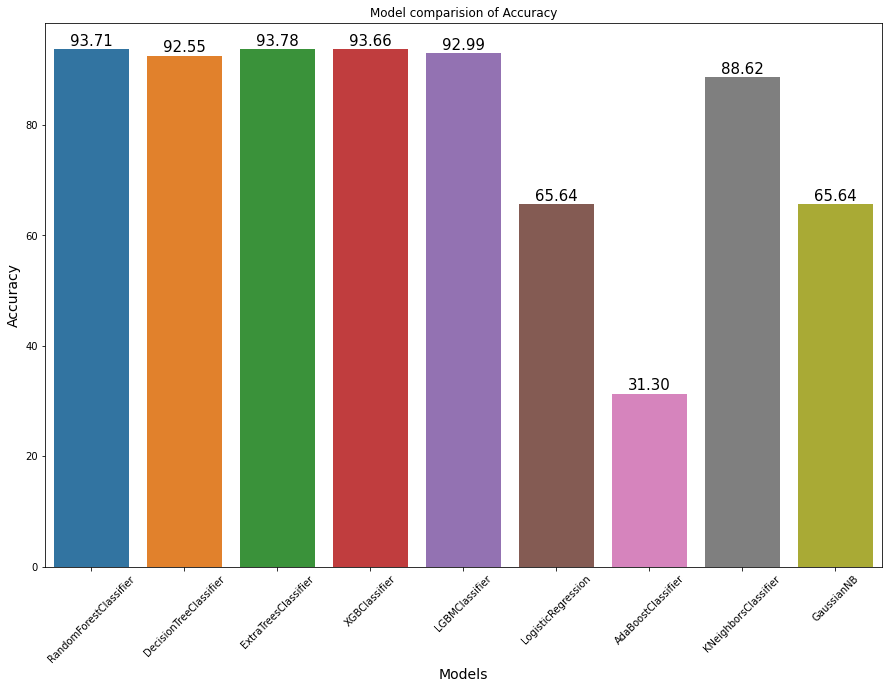

In [ ]:
plt.figure(figsize=(15, 10))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=45);
plt.ylabel("Accuracy", size=14)
plt.title('Model comparision of Accuracy')
plt.savefig('images/model-accuracy-comparision')
plt.show()



Model tine taken to fit comparision

In [ ]:
plt.figure(figsize=(15, 10))
plots = sns.barplot(x='Model', y='TimeTaken', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=45);
plt.ylabel("TimeTaken", size=14)
plt.savefig('images/ModelTimeTakenComparision')
plt.title('Model comparision of time taken to fit')
plt.show()


NameError: name 'output' is not defined

<Figure size 1080x720 with 0 Axes>

Inference: 

1. ExtraTreesClassifier  model  classifier has the best accuracy of 93.81%, followed by RandomForest with  93.67% and XGBClassifier  with 93.66. However all the three models time taken to fit was moderate. 
2. KNeighborsClassifier is the fasted model to  fit with a reasonable accuracy of 88.6.
3. LGBMClassifier is best overall model with accuracy 92.994418 and has low fit time.